In [ ]:
import requests

server = 'api.outbreak.info' # or 'dev.outbreak.info'
auth = 'Bearer 0ed52bbfb6c79d1fd8e9c6f267f9b6311c885a4c4c6f037d6ab7b3a40d586ad0' # keep this private!
nopage = 'fetch_all=true&page=0' # worth verifying that this works with newer ES versions as well

def get_outbreak_data(endpoint, argstring, server=server, auth=auth):
    auth = {'Authorization': str(auth)}
    return requests.get(f'https://{server}/{endpoint}?q={argstring}', headers=auth)

In [29]:
location = 'GBR'
data = get_outbreak_data('covid19/query', f"location_id:{location}&sort=date&fields=date,confirmed_numIncrease&{nopage}")

In [30]:
import pandas as pd
raw=data.json()["hits"]

In [31]:
import sys
sys.path.append('..')
from outbreak_data import *

In [34]:
tableGBR=outbreak_data.cases_by_location('GBR', True)
tableGBR.drop(columns=['_score', 'admin1'], axis=1)

,_id,confirmed_numIncrease,date
0,GBR_None_None2020-02-12,1,2020-02-12
1,GBR_None_None2020-02-13,1,2020-02-13
2,GBR_None_None2020-02-14,1,2020-02-14
3,GBR_None_None2020-02-15,0,2020-02-15
4,GBR_None_None2020-02-16,0,2020-02-16
...,...,...,...
861,GBR_None_None2022-06-22,32727,2022-06-22
862,GBR_None_None2022-06-23,18269,2022-06-23
863,GBR_None_None2022-06-24,16473,2022-06-24
864,GBR_None_None2022-06-25,0,2022-06-25


<AxesSubplot:title={'center':'Number of Cases Over Time'}, xlabel='Date', ylabel='Number of Cases'>

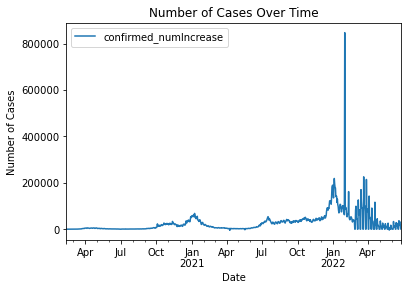

In [35]:
tableGBR.sort_values(by="date")
tableGBR.plot.line(x='date', y='confirmed_numIncrease', title='Number of Cases Over Time', xlabel='Date', ylabel='Number of Cases')

<AxesSubplot:title={'center':'Number of Cases Over Time'}, xlabel='Date', ylabel='Number of Cases'>

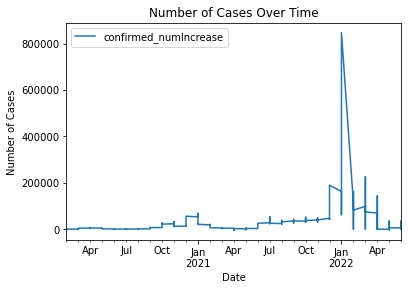

In [36]:
tableGBR['month_year'] = pd.to_datetime(tableGBR['date']).dt.to_period('M')
tableGBR.plot.line(x='month_year', y='confirmed_numIncrease', title='Number of Cases Over Time', xlabel='Date', ylabel='Number of Cases')